# Final Exam

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb

In [3]:
%matplotlib inline

In [65]:
data = pd.read_csv("C:\\Users\\Анель\\Downloads\\Customers_1\\Customers_1\\Customers_1.csv",delimiter=',')

# 1. First look at my data

In [7]:
data.head()


,TargetValue_Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Attrited Customer,59,F,1,Graduate,Single,Less than $40K,Blue,49,4,4,3214.0,2790.0,2720.0,53,0.132
1,Attrited Customer,50,M,2,Graduate,Married,$80K - $120K,Blue,31,3,3,12906.0,12585.0,2078.0,62,0.025
2,Attrited Customer,59,F,1,Graduate,Single,Unknown,Blue,49,3,6,8708.0,7617.0,2508.0,49,0.125
3,Attrited Customer,52,M,2,Unknown,Married,$80K - $120K,Blue,41,6,3,7904.0,7904.0,2094.0,32,0.000
4,Existing Customer,48,F,2,Doctorate,Divorced,Unknown,Blue,37,6,0,4549.0,3236.0,4782.0,88,0.289


In [8]:
data.shape


(4072, 16)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TargetValue_Attrition_Flag  4072 non-null   object 
 1   Customer_Age                4072 non-null   int64  
 2   Gender                      4072 non-null   object 
 3   Dependent_count             4072 non-null   int64  
 4   Education_Level             4072 non-null   object 
 5   Marital_Status              4072 non-null   object 
 6   Income_Category             4072 non-null   object 
 7   Card_Category               4072 non-null   object 
 8   Months_on_book              4072 non-null   int64  
 9   Total_Relationship_Count    4072 non-null   int64  
 10  Contacts_Count_12_mon       4072 non-null   int64  
 11  Credit_Limit                4072 non-null   float64
 12  Avg_Open_To_Buy             3965 non-null   float64
 13  Total_Trans_Amt             3971 

In [10]:
data.size


65152

In [11]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000,4072.000000,3965.000000,3971.000000,4072.000000,4072.000000
mean,46.286346,2.451375,35.735511,3.230845,2.270874,7939.701577,6819.631755,6446.502392,77.906189,0.278400
std,7.237626,1.286551,7.658649,1.648787,1.002604,9165.600926,9069.540440,4124.054349,21.460618,0.281063
min,26.000000,0.000000,-10.000000,1.000000,0.000000,-10.000000,-10.000000,-10.000000,22.000000,0.000000
25%,42.000000,2.000000,32.000000,2.000000,2.000000,2215.750000,1156.000000,4132.500000,66.000000,0.000000
50%,46.000000,2.000000,36.000000,3.000000,2.000000,3709.000000,2639.000000,4740.000000,78.000000,0.181000
75%,51.000000,3.000000,40.000000,5.000000,3.000000,9602.000000,8427.000000,7930.000000,89.000000,0.521000
max,65.000000,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,17995.000000,139.000000,0.995000


### так как у меня таргет валью является обьектом я решила поделить на Features and Target после Encoding 

# 2. Dropping or filling NAN-S

In [16]:
data.isnull().sum()

TargetValue_Attrition_Flag      0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Contacts_Count_12_mon           0
Credit_Limit                    0
Avg_Open_To_Buy               107
Total_Trans_Amt               101
Total_Trans_Ct                  0
Avg_Utilization_Ratio           0
dtype: int64

In [17]:
percent=(data.isnull().sum()/len(data))*100
percent

TargetValue_Attrition_Flag    0.000000
Customer_Age                  0.000000
Gender                        0.000000
Dependent_count               0.000000
Education_Level               0.000000
Marital_Status                0.000000
Income_Category               0.000000
Card_Category                 0.000000
Months_on_book                0.000000
Total_Relationship_Count      0.000000
Contacts_Count_12_mon         0.000000
Credit_Limit                  0.000000
Avg_Open_To_Buy               2.627701
Total_Trans_Amt               2.480354
Total_Trans_Ct                0.000000
Avg_Utilization_Ratio         0.000000
dtype: float64

### так как процентость выше 1 я решила их восстановить

In [66]:
avg=data['Avg_Open_To_Buy'].mean()
tot=data['Total_Trans_Amt'].mean()

In [67]:
data['Avg_Open_To_Buy'].fillna(value=avg, inplace=True)
data['Total_Trans_Amt'].fillna(value=tot, inplace=True)

# 3. Dropping outliers

In [68]:
data_num = data.select_dtypes(include=['int64','float64']).copy()

In [69]:
data_cat = data.select_dtypes(include=['object']).copy()

In [27]:
data_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

<AxesSubplot:>

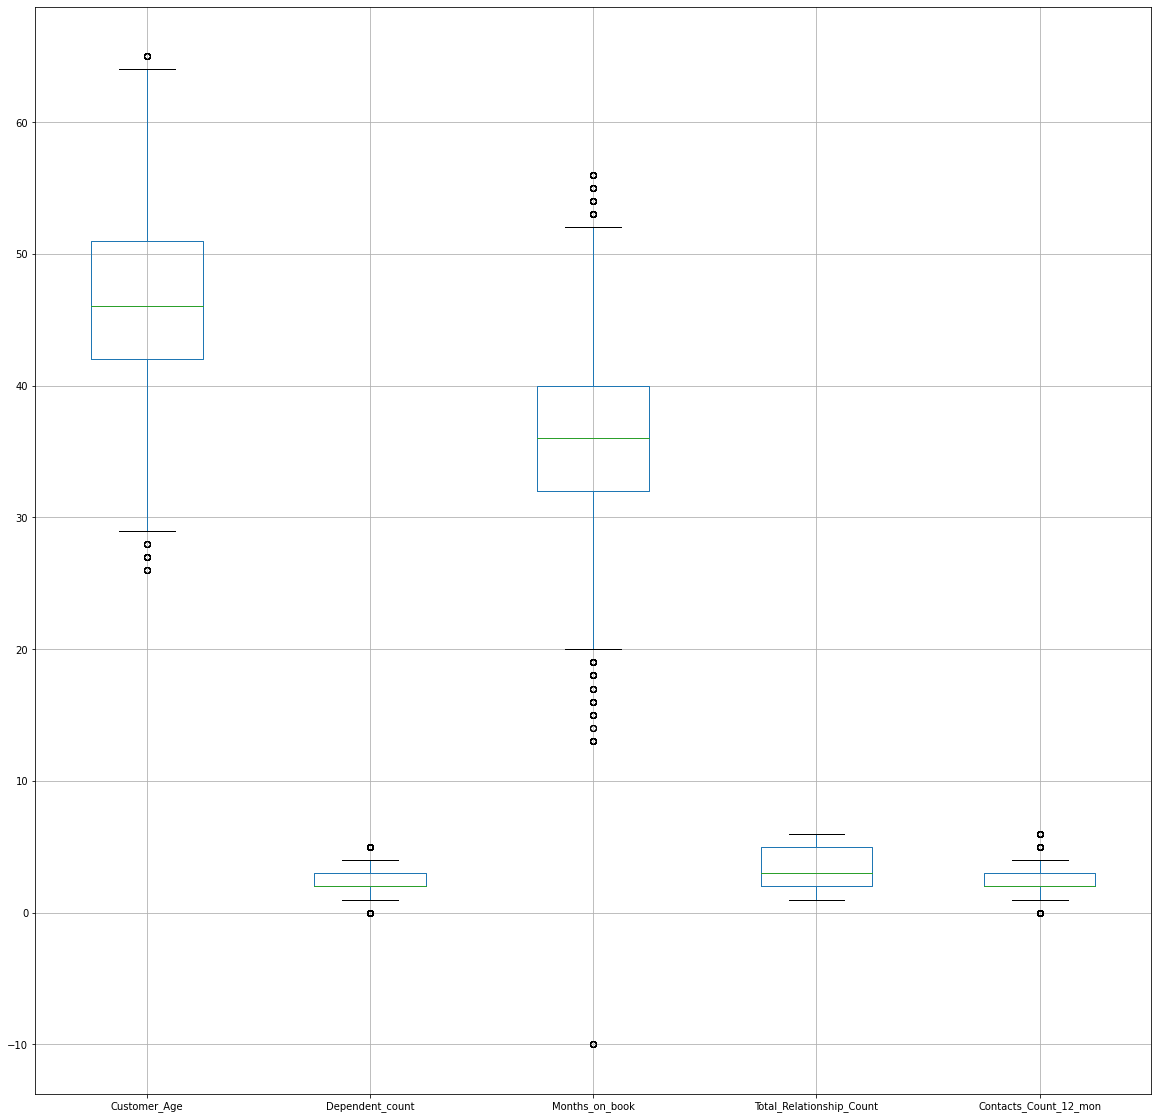

In [70]:
plt.figure(figsize=(20,20))
outlier=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon']
data.boxplot(outlier)

In [71]:
for x in outlier:
    q,k = np.percentile(data.loc[:,x],[75,25])
    intr = q-k
 
    max = q+(1.5*intr)
    min = k-(1.5*intr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

<AxesSubplot:>

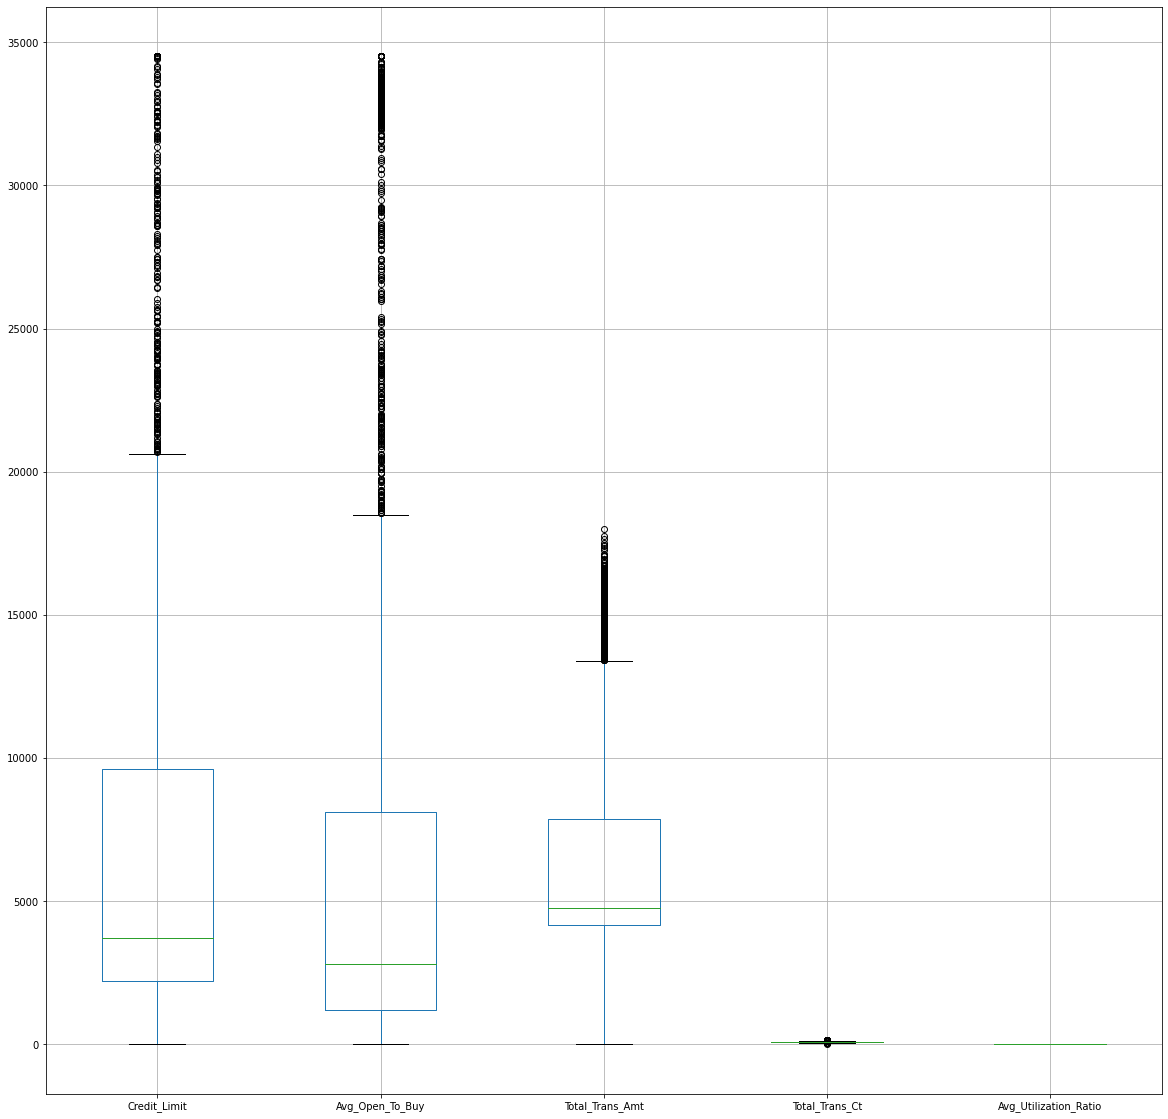

In [72]:
plt.figure(figsize=(20,20))
outlier1=['Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']
data.boxplot(outlier1)

In [73]:
for x in outlier1:
    q,k = np.percentile(data.loc[:,x],[75,25])
    intr = q-k
 
    max = q+(1.5*intr)
    min = k-(1.5*intr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [74]:
data.dropna(inplace=True)

## Далее я просмотрела аутайеры и заполнив их нан-ами удалила. 

# 4. Vizualization

In [75]:
def SimulateSamplee(mu, sigma, n, m):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        means.append(np.mean(xs))
    return means

In [76]:
import statistics

In [77]:
result=SimulateSamplee(data['Total_Trans_Amt'].mean(),statistics.stdev(data['Total_Trans_Amt']),data['Total_Trans_Amt'].size,100)

c:\users\анель\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

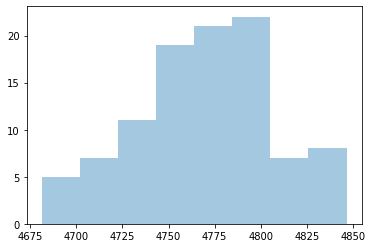

In [78]:
sb.distplot(result, hist=True, kde=False, rug=False)

### сделав выборку из популэйшн со 100 средними значениями построила гистограмму 

# 5. Correlation

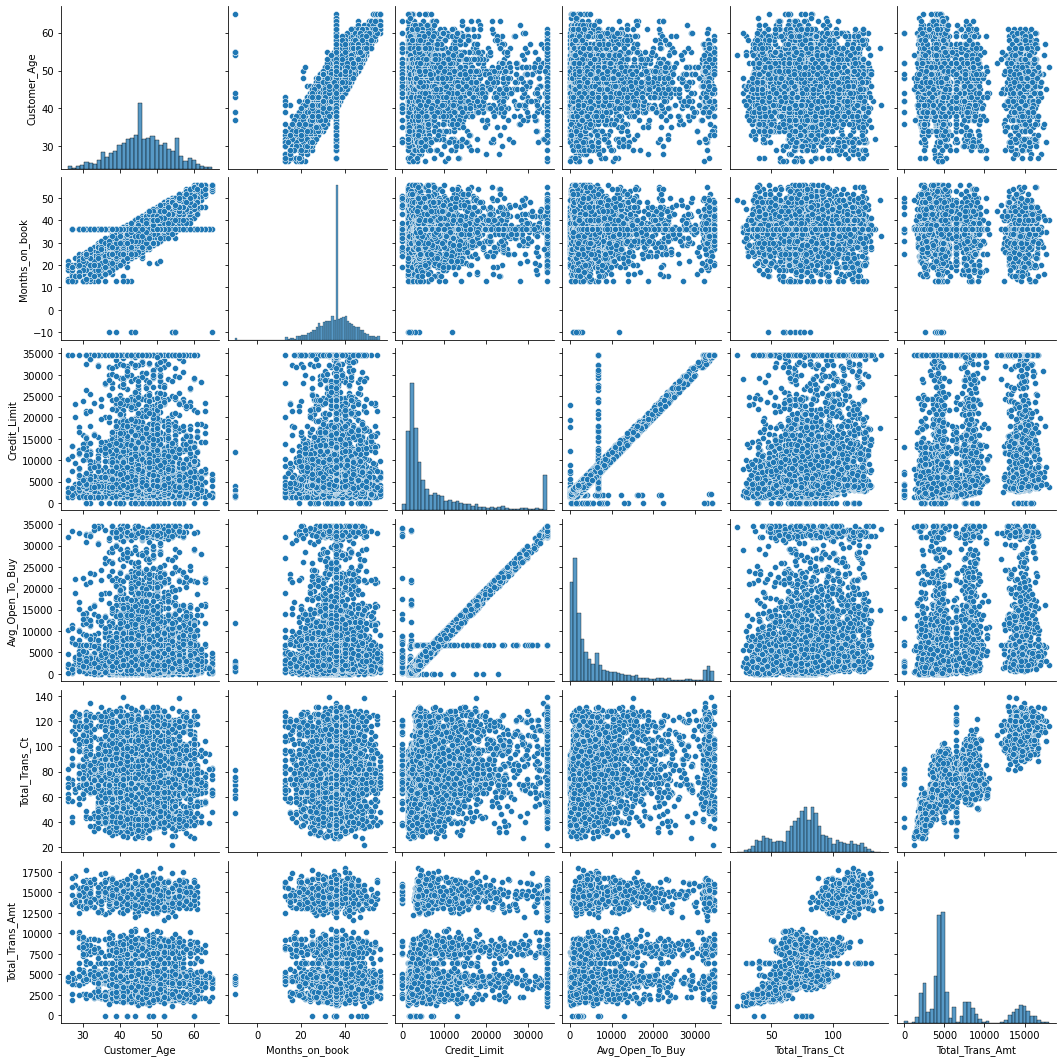

In [79]:
sb.pairplot(data_num[["Customer_Age","Months_on_book","Credit_Limit","Avg_Open_To_Buy", "Total_Trans_Ct", "Total_Trans_Amt"]])

In [42]:
data_num.corr(method='pearson')

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.112044,0.720089,0.012615,-0.010218,0.011267,0.013960,-0.076558,-0.040302,0.029440
Dependent_count,-0.112044,1.000000,-0.072393,-0.017751,0.004977,0.018951,0.020123,-0.059165,-0.042727,-0.008002
Months_on_book,0.720089,-0.072393,1.000000,-0.006096,-0.020066,0.017622,0.019121,-0.049349,-0.019438,0.011662
Total_Relationship_Count,0.012615,-0.017751,-0.006096,1.000000,0.041811,-0.177715,-0.160201,-0.303427,-0.239467,0.089103
Contacts_Count_12_mon,-0.010218,0.004977,-0.020066,0.041811,1.000000,0.019760,0.034058,-0.050486,-0.192657,-0.101750
Credit_Limit,0.011267,0.018951,0.017622,-0.177715,0.019760,1.000000,0.952851,0.367185,0.242494,-0.435259
Avg_Open_To_Buy,0.013960,0.020123,0.019121,-0.160201,0.034058,0.952851,1.000000,0.337605,0.209834,-0.492328
Total_Trans_Amt,-0.076558,-0.059165,-0.049349,-0.303427,-0.050486,0.367185,0.337605,1.000000,0.789567,-0.169994
Total_Trans_Ct,-0.040302,-0.042727,-0.019438,-0.239467,-0.192657,0.242494,0.209834,0.789567,1.000000,-0.004794
Avg_Utilization_Ratio,0.029440,-0.008002,0.011662,0.089103,-0.101750,-0.435259,-0.492328,-0.169994,-0.004794,1.000000


## просмотрев на эти коэффиценты и на пэйрплот оглядно видно что есть взаимосвязь между ними. 

# 6. Encoding

In [47]:
data_cat.columns

Index(['TargetValue_Attrition_Flag', 'Gender', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category'],
      dtype='object')

In [80]:
data.rename(columns={'TargetValue_Attrition_Flag': 'Attrition'}, inplace=True)
data.rename(columns={'Education_Level': 'Education'}, inplace=True)
data.rename(columns={'Marital_Status': 'Marital'}, inplace=True)
data.rename(columns={'Income_Category': 'Income'}, inplace=True)
data.rename(columns={'Card_Category': 'Card'}, inplace=True)

In [81]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [82]:
data.Attrition = data.Attrition.str.strip()
data.Gender = data.Gender.str.strip()
data.Education = data.Education.str.strip()
data.Marital = data.Marital.str.strip()
data.Income = data.Income.str.strip()
data.Card = data.Card.str.strip()


In [83]:
data.Attrition = LabelEncoder_.fit_transform(data.Attrition)
data.Gender = LabelEncoder_.fit_transform(data.Gender)
data.Education = LabelEncoder_.fit_transform(data.Education)
data.Marital = LabelEncoder_.fit_transform(data.Marital)
data.Income = LabelEncoder_.fit_transform(data.Income)
data.Card = LabelEncoder_.fit_transform(data.Card)


In [84]:
data

,Attrition,Customer_Age,Gender,Dependent_count,Education,Marital,Income,Card,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0,59.0,0,1.0,2,2,4,0,49.0,4.0,4.0,3214.0,2790.0,2720.0,53.0,0.132
1,0,50.0,1,2.0,2,1,3,0,31.0,3.0,3.0,12906.0,12585.0,2078.0,62.0,0.025
3,0,52.0,1,2.0,6,1,3,0,41.0,6.0,3.0,7904.0,7904.0,2094.0,32.0,0.000
5,0,46.0,0,3.0,0,1,4,0,36.0,5.0,2.0,1438.3,224.3,2445.0,39.0,0.844
6,1,49.0,0,3.0,3,1,4,0,36.0,3.0,3.0,4476.0,2984.0,4603.0,87.0,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,0,55.0,0,3.0,5,2,5,0,47.0,4.0,3.0,14657.0,12140.0,6009.0,53.0,0.172
4068,0,41.0,1,2.0,6,0,1,0,25.0,4.0,3.0,4277.0,2091.0,8764.0,69.0,0.511
4069,0,44.0,0,1.0,3,1,4,0,36.0,5.0,4.0,5409.0,5409.0,10291.0,60.0,0.000
4070,0,30.0,1,2.0,2,3,1,0,36.0,4.0,3.0,5281.0,5281.0,8395.0,62.0,0.000


### изменила формат данных на нумерикал чтобы работать в будущем с ними

In [100]:
data.columns

Index(['Attrition', 'Customer_Age', 'Gender', 'Dependent_count', 'Education',
       'Marital', 'Income', 'Card', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [101]:
features=data[['Customer_Age', 'Gender', 'Dependent_count', 'Education',
       'Marital', 'Income', 'Card', 'Months_on_book',
       'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']]
target=data[['Attrition']]

# после того как преобразовала данные в нужный формат я разделила их на Features and Target

# 7. Testing Hypothesis

In [90]:
data_hyp = data['Credit_Limit']
data_hyp

0        3214.0
1       12906.0
3        7904.0
5        1438.3
6        4476.0
         ...   
4064    14657.0
4068     4277.0
4069     5409.0
4070     5281.0
4071    10388.0
Name: Credit_Limit, Length: 2537, dtype: float64

In [91]:
def SimpleRandomSampling2(n):
    return data_hyp.iloc[np.random.randint(0, len(data_hyp), n)]

In [92]:
data_mean = data_hyp.mean()
data_std = data_hyp.std()
print(data_mean, data_std)

4591.565388253844 4002.34037527612


In [93]:
data100= SimpleRandomSampling2(100)
mean100 = data100.mean()
print(mean100)
data100

4889.6412


2433     1438.3
2651     4883.0
1903     1438.3
337      3147.0
1371    12610.0
         ...   
2979     2122.0
2281     3420.0
2574     2691.0
814      1804.0
1220     2214.0
Name: Credit_Limit, Length: 100, dtype: float64

H0 : m = 4591.565
Ha : m >4591.565 

In [95]:
nu=4889.6412

In [112]:
z= (nu-data_mean)/(data_std/np.sqrt(100))
print(z)

0.7447537785328722


### Так как наша гипотеза односторонняя я использовала  5% уровень точности.  p value для нашей z  согласно таблице равно  0.770350

### И так как наш p value больше чем наш уровень точности, мы не можем опровергнуть нулевую гипотезу. 

# 8. Improving model

In [103]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [104]:
x_train.shape, y_train.shape

((2029, 15), (2029, 1))

In [105]:
x_test.shape, y_test.shape

((508, 15), (508, 1))

In [106]:
model = tree.DecisionTreeClassifier()

In [107]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [108]:
y_predicted = model.predict(x_test)

In [109]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.9409448818897638


### Я использовала Decision потому что наш таргет принимает значения в двоичном формате

# Точность моей модели довольно высока и не требует улучшения.